In [2]:
#to manually install mysql as google colab does not suppurt it by default
!apt-get update
!apt-get install -y mysql-server
!service mysql start


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,278 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,311 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:14 htt

In [3]:
!mysql -e "ALTER USER 'root'@'localhost' IDENTIFIED WITH mysql_native_password BY 'root'; FLUSH PRIVILEGES;"


In [4]:
!cp "/content/drive/MyDrive/mysql/expense_tracker.sql" "/content/"


In [5]:
#creating and feching data from the preuploaded database
!mysql -u root -proot -e "CREATE DATABASE EXPENSE_TRACKER;"
!mysql -u root -proot EXPENSE_TRACKER < "/content/expense_tracker.sql"


mysql: [Warning] Using a password on the command line interface can be insecure.
mysql: [Warning] Using a password on the command line interface can be insecure.


In [6]:
#checking if sucessful
!mysql -u root -proot -e "SHOW DATABASES;"


mysql: [Warning] Using a password on the command line interface can be insecure.
+--------------------+
| Database           |
+--------------------+
| EXPENSE_TRACKER    |
| information_schema |
| mysql              |
| performance_schema |
| sys                |
+--------------------+


In [10]:
!pip install mysql-connector-python
!pip install matplotlib
!pip install pandas
!pip install numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18

Welcome to the Finance Management System

Choose an option:
1. View Basic Details
2. View Current Month Details
3. View All Monthly Expenses
4. View Daily Expenses
5. Input New Expense
6. Create a New User
7. See Expenses in a Graphical Form
8. Predection
9. Exit
Enter your choice (1-7): 8
Enter User ID: 1

Predicted Expenses for Next 6 Months:
   time_index  PREDICTED_EXPENSE
0          10       19559.361111
1          11       19984.277778
2          12       20409.194444
3          13       20834.111111
4          14       21259.027778
5          15       21683.944444


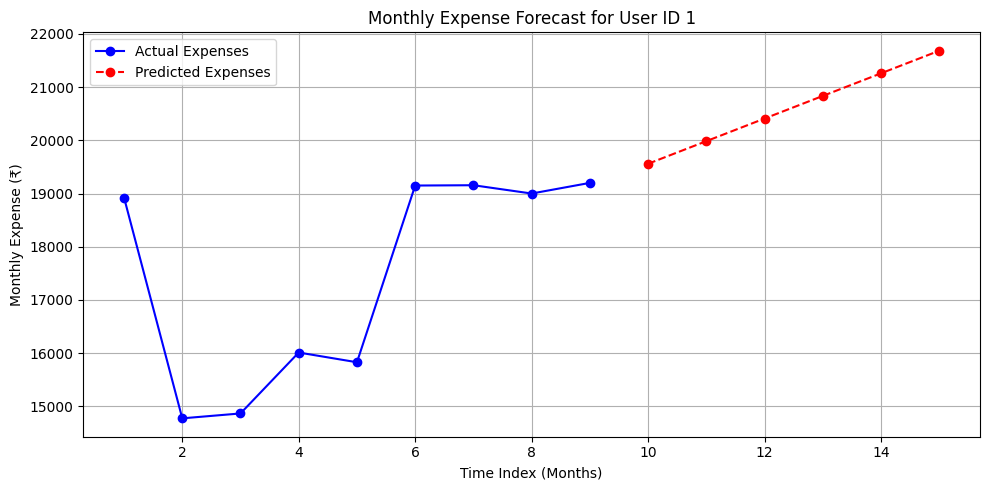


Choose an option:
1. View Basic Details
2. View Current Month Details
3. View All Monthly Expenses
4. View Daily Expenses
5. Input New Expense
6. Create a New User
7. See Expenses in a Graphical Form
8. Predection
9. Exit


In [ ]:
import mysql.connector as cnt
from datetime import date
import csv
import pandas as pd
import matplotlib.pyplot as plt
con=cnt.connect(host="localhost",user="root",password="root",database="EXPENSE_TRACKER")
cur=con.cursor()
def basic_details():
    id=int(input("enter your id:" ))
    query= "select*from expenses where ID=%s"
    cur.execute(query,(id,))
    dat=cur.fetchall()
    print("ID | NAME | TOTAL EXPENDETURE | TOTAL SAVINGS")
    for i in dat:
        print (i," ")

def cur_month_details():
    id=int(input("enter your id:" ))
    day=date.today()
    mon=day.strftime("%B")  #%B is a format code that reperesents the full name of the month
    #strftime() used to convert date or date time object into string
    year=str(day.year)
    moye=mon+" "+year
    query= "select*from monthly_expenses where MONTH_AND_YEAR=%s AND ID=%s"
    cur.execute(query,(moye,id,))
    dat=cur.fetchall()
    print("ID | MONTHLY LIMIT | MONTHLY EXPENSES | MONTHLY SAVINGS | OVERSPENDING | MONTH AND YEAR")
    for i in dat:
        print(i," ")

def all_monthly_expenses():

    id=int(input("enter your id:" ))
    query= "select*from monthly_expenses where ID=%s"
    cur.execute(query,(id,))
    dat=cur.fetchall()
    print("ID | MONTHLY LIMIT | MONTHLY EXPENSES | MONTHLY SAVINGS | OVERSPENDING | MONTH AND YEAR")
    for i in dat:
        print(i," ")

def daily_expenses():
    id=int(input("enter your id:" ))
    day=date.today()
    query= "select*from daily_expenses where id=%s AND date=%s"
    cur.execute(query,(id,day,))
    dat=cur.fetchall()
    print("ID | Date | CATEGORY | DESCRIPTION | AMOUNT")
    for i in dat:
        print(i," ")

def category_type():
    print("1. Educational Expenses")
    print("2. Housing")
    print("3. Personal Care")
    print("4. Utilities")
    print("5. Transportation")
    print("6. Miscellaneous Expenses")
    print("7. Groceries")
    print("8. Medical and Healthcare")
    print("9. Debt Repayment")
    print("10. Dining and Entertainment")
    print("11. Investment")
    ex=int(input("Enter type of expense: "))
    if ex == 1:
        return "Educational Expenses"
    elif ex == 2:
        return "HOUSING"
    elif ex == 3:
        return "Personal Care"
    elif ex == 4:
        return "Utilities"
    elif ex == 5:
        return "Transportation"
    elif ex == 6:
        return "Miscellaneous Expenses"
    elif ex == 7:
        return "Groceries"
    elif ex == 8:
        return "Medical and Healthcare"
    elif ex == 9:
        return "Debt Repayment"
    elif ex == 10:
        return "Dining and Entertainment"
    elif ex == 11:
        return "Investment"
    else:
        return "Invalid choice! Please enter a number between 1 and 9."

def input_expenses():
    id=int(input("enter your id:" ))
    day=date.today()
    amount = float(input("Enter amount: "))
    category = category_type()
    description = input("Enter descryption: ")
    query = "INSERT INTO daily_expenses VALUES (%s, %s, %s, %s, %s)"
    ex=(id,day,category, description,amount)
    cur.execute(query,ex)
    con.commit()
    new=[id,day,category,description,amount]
    with open('/content/drive/MyDrive/mysql/daily_expenses.csv','a',newline='') as f:
        wr=csv.writer(f)
        wr.writerow(new)
    inner_working(id,amount)

def create_new():
    print("WLECOME TO FINANCE MANAGEMENT SYSTEM")
    id=int(input("ENTER A NUMBER TO BE USED AS ID: "))
    query="select ID from expenses;"
    cur.execute(query)
    dat=cur.fetchall()
    for i in dat:
        if i[0]==id:
            print("This ID no. already exists create a different no.")
            return
    nam=input("Enter your name: ")
    MonLmt=float(input("set a monthly spending limit goal : "))
    query = "INSERT INTO expenses (ID,NAME) VALUES (%s, %s);"
    cur.execute(query,(id,nam))
    con.commit()
    query="INSERT INTO  monthly_expenses (ID,MONTHLY_LIMIT) VALUES (%s,%s);"
    cur.execute(query,(id,MonLmt))
    con.commit()
    day=date.today()
    amount = float(input("Enter amount: "))
    category = category_type()
    description = input("Enter descryption: ")
    query = "INSERT INTO daily_expenses VALUES (%s, %s, %s, %s, %s)"
    ex=(id,day,category,description,amount)
    cur.execute(query,ex)
    con.commit()
    mon=day.strftime("%B")  #%B is a format code that reperesents the full name of the month
    #strftime() used to convert date or date time object into string
    year=str(day.year)
    moye=mon+" "+year
    query="UPDATE monthly_expenses SET MONTH_AND_YEAR = %s WHERE ID = %s;"
    ex=(moye,id)
    cur.execute(query,ex)
    con.commit()
    query="UPDATE monthly_expenses SET MONTHLY_EXPENSE = %s WHERE ID= %s AND MONTH_AND_YEAR= %s;"
    cur.execute(query,(amount,id,moye))
    con.commit()
    s=MonLmt-amount
    new=[id,MonLmt,amount,s,0.0,moye]
    with open('/content/drive/MyDrive/mysql/monthly_expenses.csv','a',newline='') as f:
        wr=csv.writer(f)
        wr.writerow(new)
    new=[id,nam,amount,s]
    with open('/content/drive/MyDrive/mysql/expenses.csv','a',newline='') as f:
        wr=csv.writer(f)
        wr.writerow(new)
    new=[id,day,category,description,amount]
    with open('/content/drive/MyDrive/mysql/daily_expenses.csv','a',newline='') as f:
        wr=csv.writer(f)
        wr.writerow(new)


#expenses
def expense_graph():
    # Load the expenses.csv file
    df_expenses = pd.read_csv("/content/drive/MyDrive/mysql/expenses.csv")
    user_id = int(input("Enter your ID: "))

    # Filter data for the given ID
    df_expenses = df_expenses[df_expenses["ID"] == user_id]

    # Check if user data exists
    if df_expenses.empty:
        print(f"No data found for ID {user_id}.")
    else:
        name = df_expenses.iloc[0]["NAME"]

        # Set figure size
        plt.figure(figsize=(12, 6))

        # *1. Pie Chart: Total Expenditure vs. Total Savings*
        plt.subplot(1, 2, 1)
        plt.pie(
            [df_expenses["TOTAL_EXPENDETURE"].values[0], df_expenses["TOTAL_SAVINGS"].values[0]],
            labels=["Total Expenditure", "Total Savings"],
            autopct='%1.1f%%',
            colors=['red', 'green']
        )
        plt.title(f"Expenditure vs. Savings (ID: {user_id}, Name: {name})")

        # *2. Bar Chart: Total Expenditure vs. Total Savings*
        plt.subplot(1, 2, 2)
        plt.bar(["Total Expenditure", "Total Savings"], [df_expenses["TOTAL_EXPENDETURE"].values[0], df_expenses["TOTAL_SAVINGS"].values[0]], color=['red', 'green'])
        plt.ylabel("Amount (₹)")
        plt.title(f"Spending Overview (ID: {user_id}, Name: {name})")

        # Show plots
        plt.tight_layout()
        plt.show()


#monthly expenses
def monthly_expense_graph():

    # Load the monthly_expenses.csv file
    df_monthly = pd.read_csv("/content/drive/MyDrive/mysql/monthly_expenses.csv")

    user_id = int(input("Enter your ID: "))

    # Filter data for the given ID
    df_monthly = df_monthly[df_monthly["ID"] == user_id]

    # Check if user data exists
    if df_monthly.empty:
        print(f"No data found for ID {user_id}.")
    else:
        # Convert MONTH_AND_YEAR to datetime for sorting
        df_monthly["MONTH_AND_YEAR"] = pd.to_datetime(df_monthly["MONTH_AND_YEAR"], format="%B %Y")
        df_monthly = df_monthly.sort_values(by="MONTH_AND_YEAR")

        # Set figure size
        plt.figure(figsize=(14, 8))

        # *1. Line Chart: Monthly Expense Trend*
        plt.subplot(2, 2, 1)
        plt.plot(df_monthly["MONTH_AND_YEAR"].dt.strftime('%b-%Y'), df_monthly["MONTHLY_EXPENSE"], marker='o', linestyle='-', color='r', label="Expense")
        plt.xticks(rotation=45)
        plt.xlabel("Month")
        plt.ylabel("Amount (₹)")
        plt.title(f"Expense Trend Over Time (ID: {user_id})")
        plt.legend()

        # *2. Bar Chart: Monthly Expense vs. Savings vs. Limit*
        plt.subplot(2, 2, 2)
        plt.bar(df_monthly["MONTH_AND_YEAR"].dt.strftime('%b-%Y'), df_monthly["MONTHLY_EXPENSE"], label="Expense", color='r', alpha=0.7)
        plt.bar(df_monthly["MONTH_AND_YEAR"].dt.strftime('%b-%Y'), df_monthly["MONTHLY_SAVINGS"], label="Savings", color='g', alpha=0.7)
        plt.plot(df_monthly["MONTH_AND_YEAR"].dt.strftime('%b-%Y'), df_monthly["MONTHLY_LIMIT"], marker='o', linestyle='-', color='b', label="Limit")
        plt.xticks(rotation=45)
        plt.xlabel("Month")
        plt.ylabel("Amount (₹)")
        plt.title(f"Monthly Expense vs. Savings vs. Limit (ID: {user_id})")
        plt.legend()

        # *3. Pie Chart: Overspending Contribution*
        plt.subplot(2, 2, 3)
        overspending_total = df_monthly["OVERSPENDING"].sum()
        savings_total = df_monthly["MONTHLY_SAVINGS"].sum()
        plt.pie([overspending_total, savings_total], labels=["Overspending", "Savings"], autopct='%1.1f%%', colors=['red', 'green'])
        plt.title(f"Overspending vs. Savings (ID: {user_id})")

        # *4. Stacked Bar Chart: Expense Breakdown*
        plt.subplot(2, 2, 4)
        plt.bar(df_monthly["MONTH_AND_YEAR"].dt.strftime('%b-%Y'), df_monthly["MONTHLY_EXPENSE"], label="Expense", color='r', alpha=0.7)
        plt.bar(df_monthly["MONTH_AND_YEAR"].dt.strftime('%b-%Y'), df_monthly["OVERSPENDING"], label="Overspending", color='orange', alpha=0.7, bottom=df_monthly["MONTHLY_EXPENSE"])
        plt.xticks(rotation=45)
        plt.xlabel("Month")
        plt.ylabel("Amount (₹)")
        plt.title(f"Expense Breakdown: Overspending vs. Expense (ID: {user_id})")
        plt.legend()

        # Show plots
        plt.tight_layout()
        plt.show()

#daily expenses
def daily_expense_graph():

    df_daily = pd.read_csv("/content/drive/MyDrive/mysql/daily_expenses.csv")

    # Convert Date column to datetime format
    df_daily["Date"] = pd.to_datetime(df_daily["Date"])

    user_id = int(input("Enter your ID: "))

    # Filter data for the specific ID
    df_daily = df_daily[df_daily["ID"] == user_id]

    # Check if data exists for the given ID
    if df_daily.empty:
        print(f"No data found for ID {user_id}.")
    else:
        # Set figure size
        plt.figure(figsize=(14, 8))

        # *1. Line Chart: Daily Expense Trend*
        plt.subplot(2, 2, 1)
        plt.plot(df_daily["Date"], df_daily["AMOUNT"], marker='o', linestyle='-', color='b', label="Expense")
        plt.xticks(rotation=45)
        plt.xlabel("Date")
        plt.ylabel("Amount (₹)")
        plt.title(f"Daily Expense Trend (ID: {user_id})")
        plt.legend()

        # *2. Bar Chart: Expense by Category*
        plt.subplot(2, 2, 2)
        category_totals = df_daily.groupby("CATEGORY")["AMOUNT"].sum()
        category_totals.plot(kind='bar', color='orange')
        plt.xlabel("Category")
        plt.ylabel("Total Amount (₹)")
        plt.title(f"Total Expense by Category (ID: {user_id})")
        plt.xticks(rotation=45)

        # *3. Pie Chart: Expense Distribution by Category*
        plt.subplot(2, 2, 3)
        category_totals.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'blue', 'green', 'purple', 'orange'])
        plt.title(f"Expense Distribution by Category (ID: {user_id})")

        # *4. Histogram: Distribution of Expenses*
        plt.subplot(2, 2, 4)
        plt.hist(df_daily["AMOUNT"], bins=10, color='green', alpha=0.7, edgecolor='black')
        plt.xlabel("Amount (₹)")
        plt.ylabel("Frequency")
        plt.title(f"Distribution of Daily Expenses (ID: {user_id})")

        # Show plots
        plt.tight_layout()
        plt.show()



def graph():
    while True:
        print("\nChoose an option:")
        print("1. View all Expenses Graph")
        print("2. View Monthly Expenses Graph")
        print("3. View Todays Expenses Graph")
        print("4. Exit")

        choice = int(input("Enter your choice (1-4): "))

        if choice == 1:
            expense_graph()
        elif choice == 2:
            monthly_expense_graph()
        elif choice == 3:
            daily_expense_graph()
        elif choice == 4:
            break
        else:
            print("INVALID CHOICE")

def predection():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression

    df = pd.read_csv("/content/drive/MyDrive/mysql/monthly_expenses.csv")

    df["MONTH_AND_YEAR"] = df["MONTH_AND_YEAR"].astype(str).str.strip()
    df["MONTH_AND_YEAR"] = pd.to_datetime(df["MONTH_AND_YEAR"], format="%B %Y", errors='coerce')
    df["MONTHLY_EXPENSE"] = pd.to_numeric(df["MONTHLY_EXPENSE"], errors="coerce")
    df = df.dropna(subset=["MONTH_AND_YEAR", "MONTHLY_EXPENSE"])
    df = df.sort_values(by="MONTH_AND_YEAR")

    user_id = int(input("Enter User ID: "))
    user_df = df[df["ID"] == user_id][["MONTH_AND_YEAR", "MONTHLY_EXPENSE"]].copy()

    if len(user_df) < 4:
        print(" Not enough data to build a predictive model. At least 4 months of data required.")
    else:
        user_df = user_df.sort_values(by="MONTH_AND_YEAR").reset_index(drop=True)
        user_df["time_index"] = range(1, len(user_df) + 1)

        lr = LinearRegression()
        lr.fit(user_df[["time_index"]], user_df["MONTHLY_EXPENSE"])

        future_time_index = np.array([[user_df["time_index"].max() + i] for i in range(1, 7)])
        predicted_expense = lr.predict(future_time_index)

        future_df = pd.DataFrame(future_time_index, columns=["time_index"])
        future_df["PREDICTED_EXPENSE"] = predicted_expense

        print("\nPredicted Expenses for Next 6 Months:")
        print(future_df)

        plt.figure(figsize=(10, 5))
        plt.plot(user_df["time_index"], user_df["MONTHLY_EXPENSE"], marker="o", label="Actual Expenses", color="blue")
        plt.plot(future_df["time_index"], future_df["PREDICTED_EXPENSE"], marker="o", linestyle="--", label="Predicted Expenses", color="red")
        plt.xlabel("Time Index (Months)")
        plt.ylabel("Monthly Expense (₹)")
        plt.title(f"Monthly Expense Forecast for User ID {user_id}")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


def inner_working(id,amount):
    day=date.today()
    mon=day.strftime("%B")  #%B is a format code that reperesents the full name of the month
    #strftime() used to convert date or date time object into string
    year=str(day.year)
    moye=mon+" "+year
    query="select MONTHLY_EXPENSE from monthly_expenses where id=%s AND MONTH_AND_YEAR=%s;"
    cur.execute(query,(id,moye))
    dat=cur.fetchall()
    if dat:  # Check if any result was returned
        ne= dat[0][0]  # dat[0] is the tuple, dat[0][0] is the first column value
        amt = ne + amount
    query="UPDATE monthly_expenses SET MONTHLY_EXPENSE = %s WHERE ID=%s AND MONTH_AND_YEAR=%s;"
    cur.execute(query,(amt,id,moye))
    con.commit()
    query="select MONTHLY_LIMIT from monthly_expenses where id=%s AND MONTH_AND_YEAR=%s;"
    ex=(id,moye)
    cur.execute(query,ex)
    dat=cur.fetchall()
    lim=dat[0][0]
    over=0.0
    sav=0.0
    if amt>lim:
        os=amt-lim
        query="UPDATE monthly_expenses SET OVERSPENDING=%s WHERE ID=%s AND MONTH_AND_YEAR=%s;"
        cur.execute(query,(os,id,moye))
        con.commit()
        query="UPDATE monthly_expenses SET MONTHLY_SAVINGS = 0.00 WHERE ID=%s AND MONTH_AND_YEAR=%s;"
        cur.execute(query,(id,moye))
        con.commit()
        over=os
    else:
        s=lim-amt
        query="UPDATE monthly_expenses SET MONTHLY_SAVINGS = %s WHERE ID=%s AND MONTH_AND_YEAR=%s;"
        cur.execute(query,(s,id,moye))
        con.commit()
        query="UPDATE monthly_expenses SET OVERSPENDING=0.00 WHERE ID=%s AND MONTH_AND_YEAR=%s;"
        cur.execute(query,(id,moye))
        con.commit()
        sav=s
    new=[]
    ctr=0
    with open('/content/drive/MyDrive/mysql/monthly_expenses.csv','r',newline='') as f:
        r=csv.DictReader(f)
        for row in r:
            if int(row['ID'])==id and row['MONTH_AND_YEAR']==moye:
                row['MONTHLY_EXPENSE']=amt
                row['MONTHLY_SAVINGS']=sav
                row['OVERSPENDING']=over
                ctr=1
            new.append(row)
    if ctr==1:
        with open('/content/drive/MyDrive/mysql/monthly_expenses.csv', mode='w', newline='') as file:
            fields = ['ID','MONTHLY_LIMIT','MONTHLY_EXPENSE','MONTHLY_SAVINGS','OVERSPENDING','MONTH_AND_YEAR']
            writer = csv.DictWriter(file, fieldnames=fields)
            writer.writeheader()
            writer.writerows(new)
    else:
        new=[id,lim,amount,sav,0.0,moye]
        with open('/content/drive/MyDrive/mysql/monthly_expenses.csv','a',newline='') as f:
            wr=csv.writer(f)
            wr.writerow(new)
    query="SELECT MONTHLY_EXPENSE from monthly_expenses where ID=%s;"
    cur.execute(query,(id,))
    dat=cur.fetchall()
    sv=0.0
    for i in dat:
      sv+=i[0]
    query="UPDATE expenses SET TOTAL_EXPENDETURE=%s WHERE ID=%s;"
    cur.execute(query,(sv,id))
    con.commit()
    expen=sv
    query="SELECT MONTHLY_SAVINGS from monthly_expenses where ID=%s;"
    cur.execute(query,(id,))
    dat=cur.fetchall()
    sv=0.0
    for i in dat:
      sv+=i[0]
    query="UPDATE expenses SET TOTAL_SAVINGS=%s WHERE ID=%s;"
    cur.execute(query,(sv,id))
    con.commit()
    new=[]
    with open('/content/drive/MyDrive/mysql/expenses.csv','r',newline='') as f:
        r=csv.DictReader(f)
        for row in r:
            if row['ID']==id:
                row['TOTAL_EXPENDETURE']=expen
                row['TOTAL_SAVINGS']=sv
            new.append(row)
    with open('/content/drive/MyDrive/mysql/expenses.csv', mode='w', newline='') as file:
        fields = ['ID','NAME','TOTAL_EXPENDETURE','TOTAL_SAVINGS']
        writer = csv.DictWriter(file, fieldnames=fields)
        writer.writeheader()
        writer.writerows(new)




def main():
    print("Welcome to the Finance Management System")
    while True:
        print("\nChoose an option:")
        print("1. View Basic Details")
        print("2. View Current Month Details")
        print("3. View All Monthly Expenses")
        print("4. View Daily Expenses")
        print("5. Input New Expense")
        print("6. Create a New User")
        print("7. See Expenses in a Graphical Form")
        print("8. Predection")
        print("9. Exit")

        choice = int(input("Enter your choice (1-9): "))

        if choice == 1:
            basic_details()
        elif choice == 2:
            cur_month_details()
        elif choice == 3:
            all_monthly_expenses()
        elif choice == 4:
            daily_expenses()
        elif choice == 5:
            input_expenses()
        elif choice == 6:
            create_new()
        elif choice == 7:
            graph()
        elif choice == 8:
            predection()
        elif choice == 9:
            print("Exiting the program. Goodbye!")
            break
        else:
            print("Invalid choice! Please enter a number between 1 and 7.")
main()